In [22]:
import pandas as pd
import os
import numpy as np
import flopy
import matplotlib.pyplot as plt

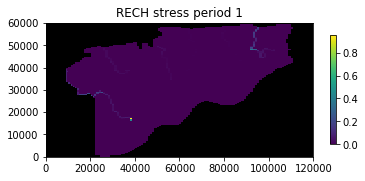

In [37]:
ml = flopy.modflow.Modflow.load('SPRING.NAM', model_ws=os.path.join('..', 'model_files', 'ebfz_b_mf_Tran-mf05-spring-man_MAC'))
# ml.hfb6.plot()
ml.rch.plot();

In [38]:
#rch = flopy.modflow.ModflowRch(ml,'RCH_og.dat')

# ml.hfb6.plot()
# ml.rch.plot();

(120, 1, 120, 120)


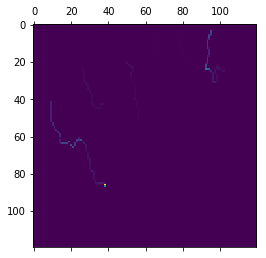

In [39]:
rech = ml.rch.rech.array
#ml.rch.rech.plot(kper=20,colorbar=True);
# plt.plot(rech[:,0,60,60],'.')
plt.matshow(rech[0,0,:,:])
print(rech.shape)

In [41]:
stressperiod = []
mean_rech = []

for fp in range(len(rech)):
    temp = rech[fp]
    avg = np.mean(temp)
    stressperiod.append(fp)
    mean_rech.append(avg)
    
df = pd.DataFrame({'stressperiod':stressperiod, 'average_recharge':mean_rech})

In [42]:
df.to_csv('case2_MAC.csv')